In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Generate simulated data
# Suppose we have 1000 patients with 3 symptoms

np.random.seed(0)
X = np.random.rand(1000, 3)  # Symptoms (as an example generate random data)
y = np.random.randint(0, 2, 1000)  # Existence of disease (0 or 1)

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and estimate the model
y_pred = model.predict(X_test)

# Show quality metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Show the coefficients of the mode
print("Coefficients of the model:", model.coef_)

Accuracy: 0.5

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.75      0.61       102
           1       0.48      0.23      0.32        98

    accuracy                           0.50       200
   macro avg       0.49      0.49      0.46       200
weighted avg       0.49      0.50      0.46       200

Coefficients of the model: [[-0.29994601  0.20706075  0.06104441]]


In [9]:
# Show probabilites
y_prob = model.predict_proba(X_test)
print(y_prob[:15])
print(y_prob.shape)

[[0.56117461 0.43882539]
 [0.49906287 0.50093713]
 [0.52459943 0.47540057]
 [0.54611904 0.45388096]
 [0.50684766 0.49315234]
 [0.51146429 0.48853571]
 [0.53417876 0.46582124]
 [0.51465881 0.48534119]
 [0.54739055 0.45260945]
 [0.50667916 0.49332084]
 [0.52103179 0.47896821]
 [0.53471652 0.46528348]
 [0.52670796 0.47329204]
 [0.52662663 0.47337337]
 [0.53372017 0.46627983]]
(200, 2)


ROC-AUC: 0.4928728070175439



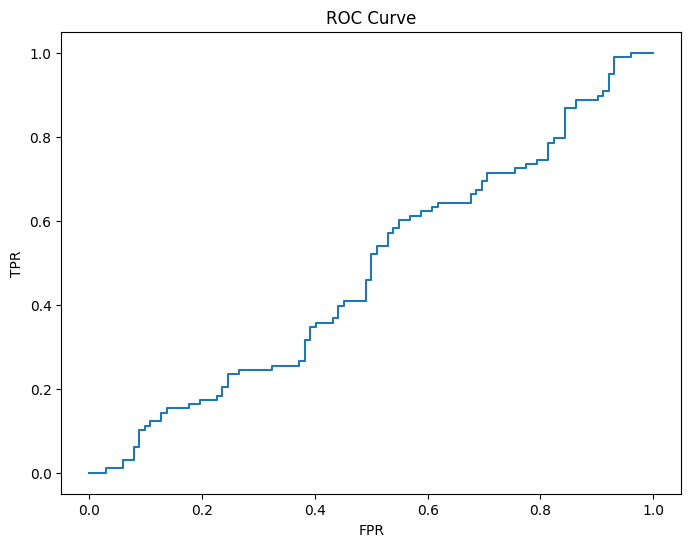

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print(f'ROC-AUC: {roc_auc_score(y_pred, y_test)}\n')

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()